# Predicting severity of heart disease through data analysis

Group 10: Samantha Lam, Sohayl Allibhai, Amanda Yang, Bolun Xie

## Introduction:

Though treatment has advanced, the prevalence of heart disease has risen in lower-income communities, contributing to cardiovascular disease being a leading cause of premature death (Bowry et al. 1151). This trend is reflected in Canada with cardiovascular disease disproportionately increasing in lower-income areas despite the overall decline of heart disease in the general population (Dai et al. 2). There is therefore demand for more efficient methods of diagnosing heart disease and we aim to ascertain the severity of heart disease for unique individuals by analyzing a list of attributes taken from a dataset from the Cleveland Clinic Foundation. (Detrano et al. 305) David W. Aha refined the raw dataset to create the processed dataset that we will utilize. (UCI Machine Learning Repository: Heart Disease Data Set). 

## Methods:
We aim to find the relationship between the chosen five variables and the severity of heart disease to discover which variable has the most influence on heart disease. 

* We picked five variables in total, **age, sex, resting blood pressure *(trestbps)*, chest pain type *(cp)*, and the number of major blood vessels colored by fluoroscopy *(ca)***. We selected **diagnosis of heart disease and severity *(nu)*** as our target variable, which we will compare to each of our five variables.

* We split the data set using chest pain type to straify, and will use the training set to train a classification model that will be used to predict severity of heart disease for a unique individual 

* We plan to utilize a bar plot to show the distribution of sex, as this is a categorical variable that we want to use to make comparisons. Scatter plots will be used to display the relationships between the remainder of our variables due to their quantitative nature.


In [2]:
#Please run this cell to load the libraries needed for data analysis 
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

In [3]:
#Please run this cell to download the dataset and read it into a dataframe.

my_url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
download.file(my_url, "cleveland.csv")
cleveland_sel <- read_csv("cleveland.csv", col_names = FALSE)
cleveland_sel <- rename(cleveland_sel, "age" = X1,
                     "sex" = X2,
                     "cp" = X3,
                     "trestbps" = X4,
                     "chol" = X5,
                     "fbs" = X6,
                     "restecg" = X7,
                     "thalach" = X8,
                     "exnag" = X9,
                     "oldpeak" = X10,
                     "slope" = X11,
                     "ca" = X12,
                     "thal" = X13,
                     "num" = X14)

Parsed with column specification:
cols(
  X1 = col_double(),
  X2 = col_double(),
  X3 = col_double(),
  X4 = col_double(),
  X5 = col_double(),
  X6 = col_double(),
  X7 = col_double(),
  X8 = col_double(),
  X9 = col_double(),
  X10 = col_double(),
  X11 = col_double(),
  X12 = col_character(),
  X13 = col_character(),
  X14 = col_double()
)



In [4]:
#Here we select for our chosen attributes

cleveland_df_sel<-select(cleveland_sel,age, sex, cp, trestbps, ca, num)
cleveland_df_sel

age,sex,cp,trestbps,ca,num
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
63,1,1,145,0.0,0
67,1,4,160,3.0,2
67,1,4,120,2.0,1
⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,1.0,3
57,0,2,130,1.0,1
38,1,3,138,?,0


In [5]:
#Please run this cell to filter out rows with missing data 

cleveland_df_sel_f <- filter(cleveland_df_sel, ca != "?") 
c_processed <- cleveland_df_sel_f
c_processed

age,sex,cp,trestbps,ca,num
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
63,1,1,145,0.0,0
67,1,4,160,3.0,2
67,1,4,120,2.0,1
⋮,⋮,⋮,⋮,⋮,⋮
68,1,4,144,2.0,2
57,1,4,130,1.0,3
57,0,2,130,1.0,1


In [6]:
#Run this cell to standardize the data
#To grp members: not sure if we actually need to include this? 

c_processed_scaled <- c_processed %>% 
 mutate(scaled_trestbps= scale(trestbps, center = TRUE))

In [7]:
#Run this to set the seed. (not optional)
set.seed(888)

patients_split<-initial_split(cleveland_df_sel_f, prop = 0.75, strata = cp)  
patients_train<- training(patients_split)
patients_test<- testing(patients_split)

patients_test
patients_train


age,sex,cp,trestbps,ca,num
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
67,1,4,120,2.0,1
37,1,3,130,0.0,0
57,1,4,140,0.0,0
⋮,⋮,⋮,⋮,⋮,⋮
57,0,4,140,0.0,1
68,1,4,144,2.0,2
57,1,4,130,1.0,3


age,sex,cp,trestbps,ca,num
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
63,1,1,145,0.0,0
67,1,4,160,3.0,2
41,0,2,130,0.0,0
⋮,⋮,⋮,⋮,⋮,⋮
59,1,4,164,2.0,3
45,1,1,110,0.0,1
57,0,2,130,1.0,1


In [8]:
#Run this cell to obtain the total number of patients 

num_Patients <- patients_train %>% summarize(n_patients = n())
num_Patients

n_patients
<int>
225


In [9]:
#Run this cell to obtain the number of male and female patients respectively. 

n_each_gender <- patients_train %>% group_by(sex) %>% summarize(n= n())

n_each_gender <- pivot_wider(n_each_gender, names_from = sex, values_from = n)

n_each_gender <- 
        rename(n_each_gender, 
              "female" = "0",
              "male" = "1") %>% mutate("female" = as.character(female), "male" = as.character(male))

n_each_gender <- pivot_longer(n_each_gender, cols = female:male, names_to = "Sex", values_to = "n") %>% mutate(n = as.numeric(n))

n_each_gender 


`summarise()` ungrouping output (override with `.groups` argument)



Sex,n
<chr>,<dbl>
female,75
male,150


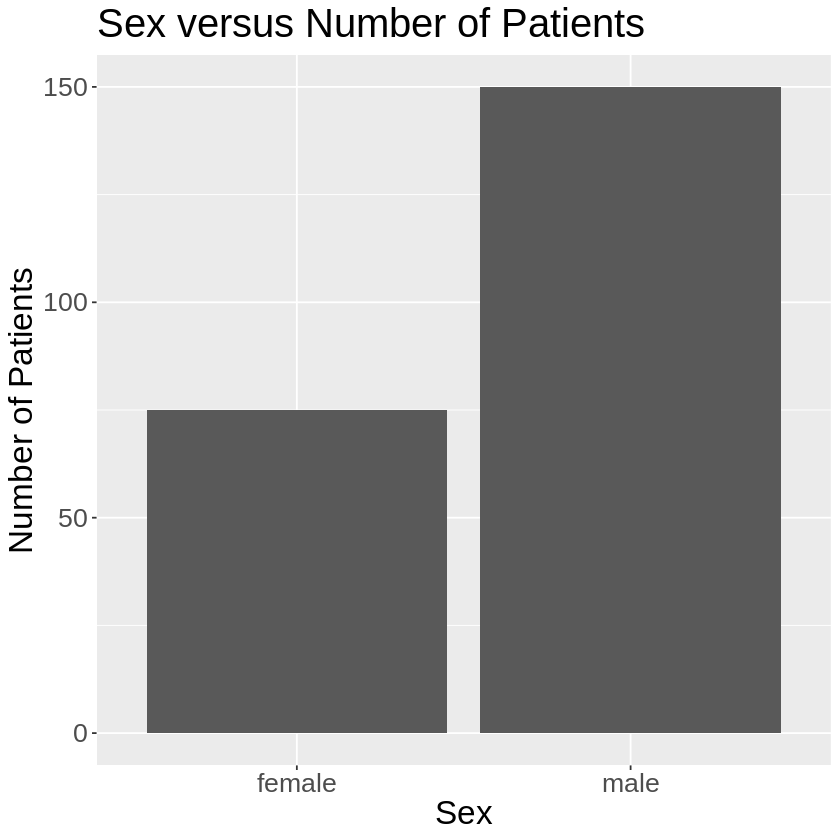

In [10]:
#Run this cell to obtain a visualisation of the proportion of male and female patients

options(repr.plot.width = 7, repr.plot.height = 7)

sex_bar<- ggplot(n_each_gender, aes(x = Sex, y = n)) + 
    geom_bar(stat = "identity") +
    xlab("Sex") +
    ylab("Number of Patients")+
    theme(text = element_text(size = 20))+ 
    ggtitle("Sex versus Number of Patients")

sex_bar

In [11]:
#Run this cell to find the average age of both female and male patients respectively

mean_age <- patients_train %>% group_by(sex) %>% summarize(avg = mean(age))

mean_age <- pivot_wider(mean_age, names_from = sex, values_from = avg)

mean_age <- 
        rename(mean_age, 
              "female" = "0",
              "male" = "1") %>% mutate("female" = as.character(female), "male" = as.character(male))

mean_age <- pivot_longer(mean_age, cols = female:male, names_to = "sex", values_to = "avg_age") %>% mutate(avg_age = as.numeric(avg_age))

mean_age


`summarise()` ungrouping output (override with `.groups` argument)



sex,avg_age
<chr>,<dbl>
female,56.57333
male,53.82667


In [12]:
#Run this cell to find the exact distribution of patients with each type of chest pain 

n_chest_pain <- patients_train %>% group_by(cp) %>% summarize(n = n())

n_chest_pain <- pivot_wider(n_chest_pain, names_from = cp, values_from = n)

n_chest_pain <- 
        rename(n_chest_pain, 
              "typical_angina" = "1",
              "atypical_angina" = "2", "Non_anginal_pain" = "3", "Asymptomatic" = "4") 

n_chest_pain <- pivot_longer(n_chest_pain, cols = typical_angina:Asymptomatic, names_to = "chest_pain", values_to = "n") %>% mutate(n = as.numeric(n))


n_chest_pain


`summarise()` ungrouping output (override with `.groups` argument)



chest_pain,n
<chr>,<dbl>
typical_angina,15
atypical_angina,37
Non_anginal_pain,62
Asymptomatic,111


In [13]:
#Run this cell to find the minimum and maximum rest blood pressure in each age group. 
#Young adult (18-35 years old)
#Middle adult(36-55 years old)
#Old adult (>55 years old)
#Classifications obtained from (Marateb and Goudarzi, 216) 


young_adult_bps <- patients_train %>%
select(age,trestbps) %>%
filter(between(age,18, 35))

middle_adult_bps <- patients_train %>%
select(age,trestbps) %>%
filter(between(age,36, 55))

old_adult_bps <- patients_train %>%
select(age, trestbps) %>%
filter(between(age,55,77))

max_young_trestbps <- young_adult_bps %>% 
    arrange(desc(trestbps))%>% 
    head(n=1)

min_young_trestbps <- young_adult_bps %>% 
    arrange(desc(trestbps)) %>%
    tail(n=1)

max_middle_trestbps <- middle_adult_bps %>% 
    arrange(desc(trestbps)) %>%
    head(n=1)

min_middle_trestbps <- middle_adult_bps %>% 
    arrange(desc(trestbps)) %>%
    tail(n=1)

max_old_trestbps <- old_adult_bps %>% 
    arrange(desc(trestbps)) %>%
    head(n=1)

min_old_trestbps <- old_adult_bps %>% 
    arrange(desc(trestbps)) %>%
    tail(n=1)


max_young_trestbps
min_young_trestbps

max_middle_trestbps
min_middle_trestbps

max_old_trestbps
min_old_trestbps


age,trestbps
<dbl>,<dbl>
35,138


age,trestbps
<dbl>,<dbl>
34,118


age,trestbps
<dbl>,<dbl>
55,180


age,trestbps
<dbl>,<dbl>
51,94


age,trestbps
<dbl>,<dbl>
56,200


age,trestbps
<dbl>,<dbl>
58,100


In [14]:
#Run this cell to obtain mean resting blood pressure in relation to ca

mean_rbp <- patients_train %>% group_by(ca) %>% summarize(avg_rbp = mean(trestbps))
mean_rbp

`summarise()` ungrouping output (override with `.groups` argument)



ca,avg_rbp
<chr>,<dbl>
0.0,131.8898
1.0,127.7115
2.0,138.3333
3.0,137.2632


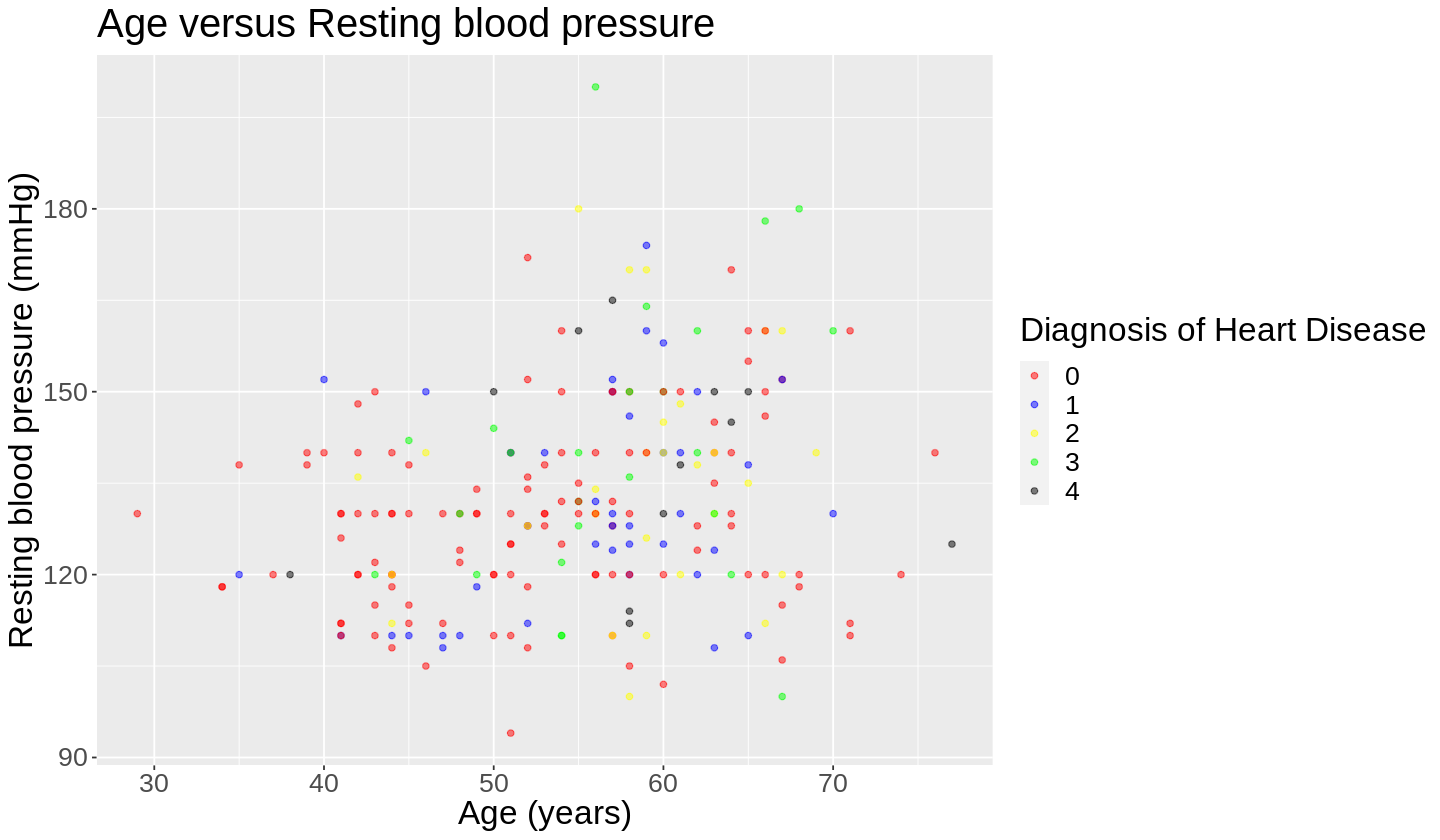

In [15]:
#Run this cell to obtain visualisation of Age versus Resting blood pressure

options(repr.plot.width = 12, repr.plot.height = 7)

age_vs_rbps_plot <- ggplot(patients_train, aes(x = age, y = trestbps, color = as_factor(num))) +
                    geom_point(alpha = 0.5) +
                    labs(x = "Age (years)", y = "Resting blood pressure (mmHg)", color = "Diagnosis of Heart Disease") +
                    theme(text = element_text(size = 20)) + 
                    ggtitle("Age versus Resting blood pressure") +
                    scale_color_manual(labels = c("0", "1","2","3","4"), values = c("red","blue","yellow","green","black"))
age_vs_rbps_plot

## Expected outcomes and significance
Increasing age and risk of contracting heart disease has consistently shown to be positively correlated (Roth et al. 2985) and the average lifestyle men lead incorporates more high-risk factors for heart disease compared to women. (Dai et al. 6) Older men are therefore more likely to contract cardiovascular diseases, and we would expect to see this reflected in our results.
 
Ultimately, we aim to create a classification model that can contribute to the ongoing effort to help healthcare workers efficiently target individuals at risk of developing heart disease or quickly identify the severity of the disease for patients. 


## Limitations and further questions

The dataset used to train our model used data collected from May 1981 to 1984 (Detrano et al. 305), and the age of the data was assumed negligible. Therefore, it would be interesting to repeat the project with more recent data to compare for any differences in observations. Furthermore, the proportion of low-income individuals in the test group is unknown. Considering the goal of our project, it would be worth exploring if focusing more explicitly on low-income individuals using the same model would produce different results

## Bibliography 

Bowry, Ashna D. K., et al. ‘The Burden of Cardiovascular Disease in Low- and Middle-Income Countries: Epidemiology and Management’. Canadian Journal of Cardiology, vol. 31, no. 9, Sept. 2015, pp. 1151–59. DOI.org (Crossref), https://doi.org/10.1016/j.cjca.2015.06.028.

Dai, Haijiang, et al. ‘Regional and Socioeconomic Disparities in Cardiovascular Disease in Canada during 2005–2016: Evidence from Repeated Nationwide Cross-Sectional Surveys’. BMJ Global Health, vol. 6, no. 11, Nov. 2021, p. e006809. DOI.org (Crossref), https://doi.org/10.1136/bmjgh-2021-006809.

Detrano, Robert, et al. ‘International Application of a New Probability Algorithm for the Diagnosis of Coronary Artery Disease’. The American Journal of Cardiology, vol. 64, no. 5, Aug. 1989, pp. 304–10. ScienceDirect, https://doi.org/10.1016/0002-9149(89)90524-9.

UCI Machine Learning Repository: Heart Disease Data Set. https://archive.ics.uci.edu/ml/datasets/Heart+Disease. Accessed 3 Mar. 2022.

Roth, Gregory A., et al. ‘Global Burden of Cardiovascular Diseases and Risk Factors, 1990–2019’. Journal of the American College of Cardiology, vol. 76, no. 25, Dec. 2020, pp. 2982–3021. DOI.org (Crossref), https://doi.org/10.1016/j.jacc.2020.11.010.

Marateb, Hamid Reza, and Sobhan Goudarzi. ‘A Noninvasive Method for Coronary Artery Diseases Diagnosis Using a Clinically-Interpretable Fuzzy Rule-Based System’. Journal of Research in Medical Sciences : The Official Journal of Isfahan University of Medical Sciences, vol. 20, no. 3, Mar. 2015, pp. 214–23.

